In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
train_df = pd.read_csv("wat-time-interval-1000.csv")

In [6]:
train_df.head()

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target,tot_packets,tot_mean
0,1000,65,20,6,4,46,27,22,19,21,...,14,20,65,14,20,70,100,1,269,17.933333
1,1000,66,86,22,12,47,70,29,26,27,...,33,34,131,33,34,165,146,0,503,33.533333
2,2000,77,91,15,10,51,61,10,4,28,...,37,44,134,38,44,176,109,0,495,33.000000
3,2000,68,24,10,7,43,12,8,0,21,...,15,16,67,16,16,75,65,1,239,15.933333
4,3000,47,10,9,1,31,1,2,2,31,...,13,10,48,12,10,65,65,1,200,13.333333


In [7]:
train_X = train_df.drop(columns=['time_intervals','target'])

In [8]:
train_X

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,tot_packets,tot_mean
0,65,20,6,4,46,27,22,19,21,11,...,100,14,20,65,14,20,70,100,269,17.933333
1,66,86,22,12,47,70,29,26,27,43,...,146,33,34,131,33,34,165,146,503,33.533333
2,77,91,15,10,51,61,10,4,28,46,...,109,37,44,134,38,44,176,109,495,33.000000
3,68,24,10,7,43,12,8,0,21,6,...,65,15,16,67,16,16,75,65,239,15.933333
4,47,10,9,1,31,1,2,2,31,26,...,65,13,10,48,12,10,65,65,200,13.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,77,24,18,18,41,12,6,12,35,11,...,47,54,42,77,54,42,64,47,284,18.933333
6299,81,39,30,18,42,26,24,24,24,14,...,96,70,87,80,71,87,78,96,400,26.666667
6300,73,36,30,18,36,12,18,6,30,18,...,66,66,66,72,66,67,66,66,337,22.466667
6301,69,15,6,6,42,16,6,12,36,16,...,30,62,27,70,61,27,66,30,254,16.933333


In [9]:
x = train_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)

In [10]:
corr_df = pd.concat([train_X, train_df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,target
0,1.000000,0.852018,0.813404,0.646446,0.888406,0.654695,0.679588,0.584164,0.782763,0.617532,...,0.847267,0.904626,0.974841,0.847766,0.905310,0.833451,0.898482,0.954266,0.954266,-0.004230
1,0.852018,1.000000,0.873634,0.723998,0.644690,0.685840,0.564432,0.521348,0.542039,0.592191,...,0.664602,0.886241,0.912469,0.665922,0.886324,0.699477,0.900332,0.871225,0.871225,-0.044867
2,0.813404,0.873634,1.000000,0.811143,0.612568,0.491640,0.586711,0.511068,0.514305,0.451041,...,0.620687,0.915244,0.826627,0.621955,0.914432,0.608194,0.896239,0.827053,0.827053,-0.015658
3,0.646446,0.723998,0.811143,1.000000,0.471697,0.432813,0.337859,0.615132,0.401173,0.408251,...,0.505624,0.833711,0.655636,0.506490,0.832323,0.489444,0.813263,0.698062,0.698062,-0.012170
4,0.888406,0.644690,0.612568,0.471697,1.000000,0.693032,0.717216,0.581269,0.897094,0.656349,...,0.905884,0.742168,0.882161,0.905030,0.742644,0.911574,0.766928,0.899537,0.899537,-0.005857
5,0.654695,0.685840,0.491640,0.432813,0.693032,1.000000,0.664308,0.587628,0.493682,0.625944,...,0.636526,0.625827,0.731828,0.637258,0.626732,0.697044,0.674018,0.723469,0.723469,-0.047133
6,0.679588,0.564432,0.586711,0.337859,0.717216,0.664308,1.000000,0.537563,0.535934,0.424133,...,0.652828,0.651426,0.696638,0.653703,0.651143,0.649618,0.662081,0.713619,0.713619,-0.013411
7,0.584164,0.521348,0.511068,0.615132,0.581269,0.587628,0.537563,1.000000,0.500584,0.473987,...,0.618613,0.720103,0.589834,0.619207,0.719625,0.596362,0.708822,0.678947,0.678947,-0.008642
8,0.782763,0.542039,0.514305,0.401173,0.897094,0.493682,0.535934,0.500584,1.000000,0.724614,...,0.918603,0.657652,0.770611,0.917298,0.657882,0.918667,0.677773,0.836594,0.836594,-0.000724
9,0.617532,0.592191,0.451041,0.408251,0.656349,0.625944,0.424133,0.473987,0.724614,1.000000,...,0.731984,0.601594,0.665508,0.732035,0.601496,0.771265,0.647155,0.729273,0.729273,-0.034100


In [11]:
train_Y = train_df['target']

In [12]:
train_Y

0       1
1       0
2       0
3       1
4       1
       ..
6298    0
6299    1
6300    0
6301    1
6302    1
Name: target, Length: 6303, dtype: int64

In [13]:
model = Sequential()

In [14]:
n_cols = train_X.shape[1]
n_cols

32

In [15]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [17]:
early_stopping_monitor = EarlyStopping(patience=20)

In [18]:
model.fit(train_X, train_Y, epochs=30, validation_split=0.6, callbacks=[early_stopping_monitor])

Train on 2521 samples, validate on 3782 samples
Epoch 1/30
2521/2521 [==============================] - 1s 391us/step - loss: 0.2501 - accuracy: 0.4903 - val_loss: 0.2500 - val_accuracy: 0.5032
Epoch 2/30
2521/2521 [==============================] - 0s 142us/step - loss: 0.2501 - accuracy: 0.4899 - val_loss: 0.2500 - val_accuracy: 0.4984
Epoch 3/30
2521/2521 [==============================] - 0s 130us/step - loss: 0.2501 - accuracy: 0.4831 - val_loss: 0.2500 - val_accuracy: 0.4989
Epoch 4/30
2521/2521 [==============================] - 0s 137us/step - loss: 0.2501 - accuracy: 0.4935 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 5/30
2521/2521 [==============================] - 0s 123us/step - loss: 0.2501 - accuracy: 0.4939 - val_loss: 0.2500 - val_accuracy: 0.5021
Epoch 6/30
2521/2521 [==============================] - 0s 136us/step - loss: 0.2501 - accuracy: 0.4939 - val_loss: 0.2500 - val_accuracy: 0.5048
Epoch 7/30
2521/2521 [==============================] - 0s 134us/step - loss

In [19]:
pred = model.predict(train_X)

In [20]:
for i in range(100):
    print("%s, %s" % (pred[i], train_Y[i]))

[0.49993557], 1
[0.50159234], 0
[0.49945128], 0
[0.49996483], 1
[0.49945128], 1
[0.50025576], 0
[0.49945128], 1
[0.49945128], 0
[0.50036764], 1
[0.5011762], 0
[0.49945128], 0
[0.49945128], 1
[0.5002922], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.49980268], 0
[0.5005622], 1
[0.49945128], 0
[0.49945128], 1
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.5015516], 0
[0.50140154], 1
[0.49945128], 0
[0.49945128], 0
[0.49945128], 1
[0.49945128], 1
[0.50155723], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.5006415], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 0
[0.4998123], 1
[0.4997392], 1
[0.49945128], 0
[0.49945128], 0
[0.49945128], 1
[0.5003561], 1
[0.49945128], 0
[0.49945128], 1
[0.49945128], 0
[0.49945128], 1
[0.49945128], 0
[0.50113326], 0
[0.49962097], 1
[0.49945128], 0
[0.49962252], 1
[0.5007673], 1
[0.5002171], 0
[0.50142145], 0
[0.5007185], 1
[0.49945128], 1
[0.

In [21]:
pca = PCA(n_components = 2)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[ 1.02501757, -0.06626766],
       [ 2.23864715, -0.17466156],
       [ 2.26831966, -0.41753777],
       ...,
       [ 1.66866697, -0.07683613],
       [ 1.11740283, -0.46689328],
       [ 1.85503337, -0.04833022]])

In [24]:
pca.explained_variance_ratio_

array([0.79235979, 0.06382752])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

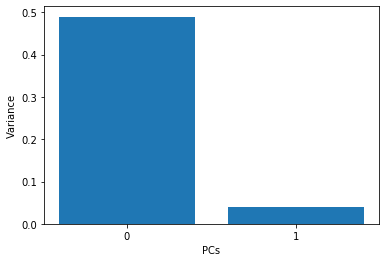

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components , columns = ['pc 1', 'pc 2'])
principal_df

,pc 1,pc 2
0,1.025018,-0.066268
1,2.238647,-0.174662
2,2.268320,-0.417538
3,0.885149,-0.201511
4,0.653281,-0.271108
...,...,...
6298,1.301384,-0.180516
6299,2.092830,0.022851
6300,1.668667,-0.076836
6301,1.117403,-0.466893


In [28]:
final_df = pd.concat([principal_df, train_df[['target']]], axis = 1)
final_df

,pc 1,pc 2,target
0,1.025018,-0.066268,1
1,2.238647,-0.174662,0
2,2.268320,-0.417538,0
3,0.885149,-0.201511,1
4,0.653281,-0.271108,1
...,...,...,...
6298,1.301384,-0.180516,0
6299,2.092830,0.022851,1
6300,1.668667,-0.076836,0
6301,1.117403,-0.466893,1


In [29]:
final_df.corr()

,pc 1,pc 2,target
pc 1,1.000000e+00,-1.847923e-14,-0.016276
pc 2,-1.847923e-14,1.000000e+00,-0.009200
target,-1.627601e-02,-9.199722e-03,1.000000


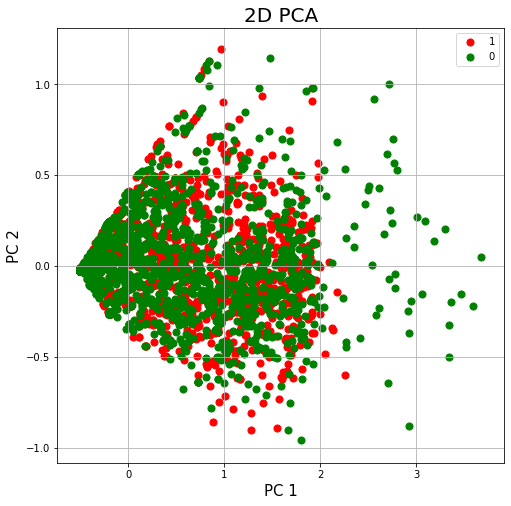

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'pc 1']
               , final_df.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

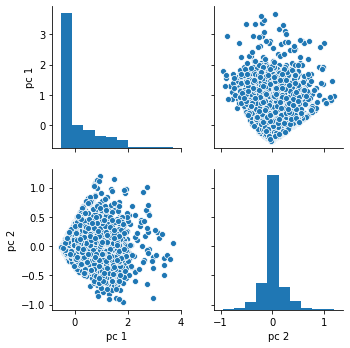

In [31]:
sns.pairplot(final_df.loc[:,final_df.dtypes == 'float64'])

In [32]:
corr_df[corr_df.duplicated()].shape

(3901, 33)

In [33]:
dup_df = train_df.drop(columns=['time_intervals'])


In [34]:
dup_df[dup_df.duplicated()].shape

(3901, 33)

In [35]:
dup_df[dup_df.duplicated()].count()

r0               3901
r1               3901
r2               3901
r3               3901
r4               3901
r5               3901
r6               3901
r7               3901
r8               3901
r9               3901
r10              3901
r11              3901
r12              3901
r13              3901
r14              3901
r15              3901
pkt_get          3901
pkt_data         3901
pkt_put          3901
pkt_ack          3901
inport_local     3901
inport_north     3901
inport_south     3901
inport_east      3901
inport_west      3901
outport_local    3901
outport_north    3901
outport_south    3901
outport_east     3901
outport_west     3901
target           3901
tot_packets      3901
tot_mean         3901
dtype: int64

In [36]:
print ((3901/6303)*100)

61.89116293828336
